In [22]:
import random
import math
from collections import Counter
from matplotlib import pyplot as plt

In [ ]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [26]:

    
def bernoulli_trial(p):
    return 1 if random.random() < p else 0



In [27]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))
 



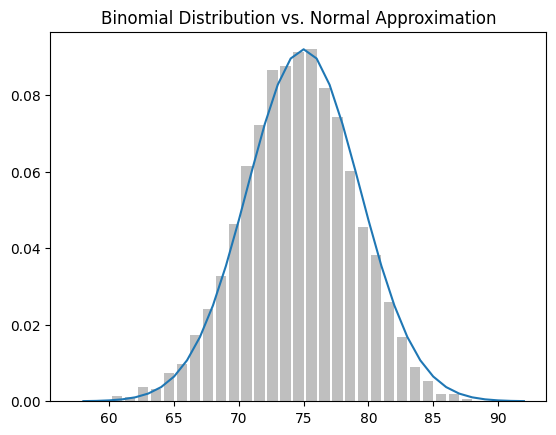

In [28]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
    color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
                    for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
make_hist(0.75, 100, 10000)